In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

In [11]:
Data = pd.read_csv("InterpolacionNewtonNoequi.csv",sep=',')

In [12]:
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [13]:
Diff = np.zeros((len(X),len(Y)))
Diff[:,0] = Y
for i in range(1,len(X)):
    for j in range(i,len(Y)):
        Diff[j,i] = Diff[j,i-1]-Diff[j-1,i-1]

Diff

array([[-18.,   0.,   0.,   0.,   0.,   0.],
       [-13.,   5.,   0.,   0.,   0.,   0.],
       [  0.,  13.,   8.,   0.,   0.,   0.],
       [  5.,   5.,  -8., -16.,   0.,   0.],
       [  3.,  -2.,  -7.,   1.,  17.,   0.],
       [ 10.,   7.,   9.,  16.,  15.,  -2.]])

In [14]:
def NewtonGregory(X,Y,x):
    
    Sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(Y)))
    Diff[:,0] = Y
    
    h = X[1]-X[0]
    
    poly = 1.0
    
    for i in range(1,len(X)):
        poly *= (x - X[i-1])
        for j in range(i, len(X)):
            Diff[j,i] = Diff[j,i-1]-Diff[j-1,i-1]
            
        Sum_ += poly*(Diff[i,i])/(np.math.factorial(i)*h**(i))
    return Sum_,np.round(Diff,2)

In [15]:
x = np.linspace(np.min(X),np.max(X),100)
y,_ = NewtonGregory(X,Y,x)

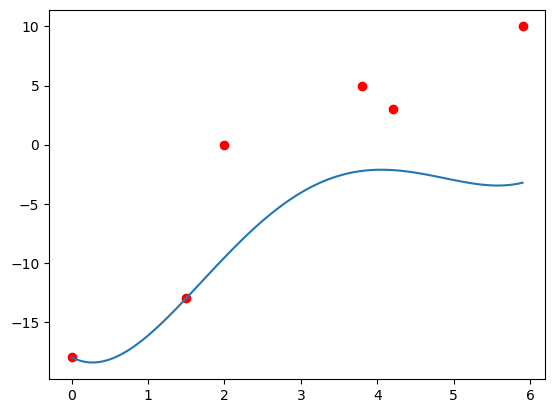

In [16]:
plt.scatter(X,Y,color = 'r')
plt.plot(x,y)

In [17]:
x = sym.Symbol('x',Real='True')
y,_ = NewtonGregory(X,Y,x)

In [18]:
y

-0.00219478737997257*x*(x - 4.2)*(x - 3.8)*(x - 2.0)*(x - 1.5) + 0.139917695473251*x*(x - 3.8)*(x - 2.0)*(x - 1.5) - 0.790123456790123*x*(x - 2.0)*(x - 1.5) + 1.77777777777778*x*(x - 1.5) + 3.33333333333333*x - 18.0

In [19]:
y = y.simplify()

In [20]:
y

-0.00219478737997257*x**5 + 0.165157750342936*x**4 - 1.91458984910837*x**3 + 6.99914403292181*x**2 - 3.40385185185185*x - 18.0